Dataset Loaded Successfully

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ----

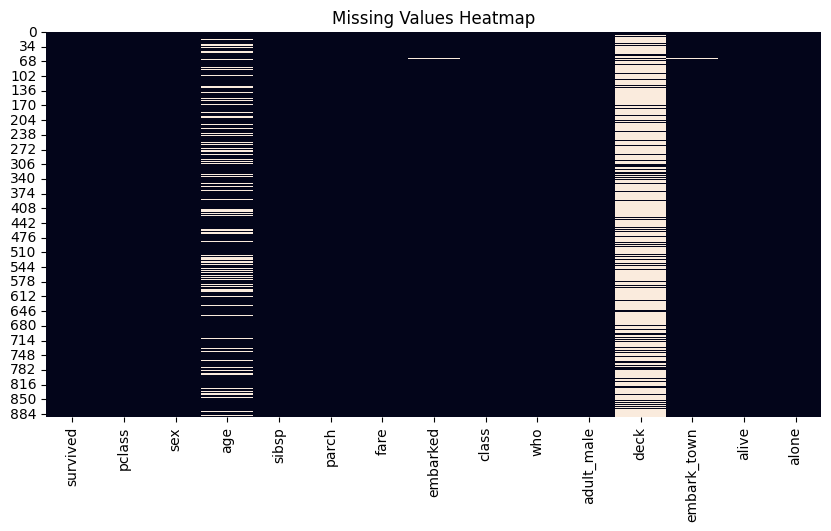

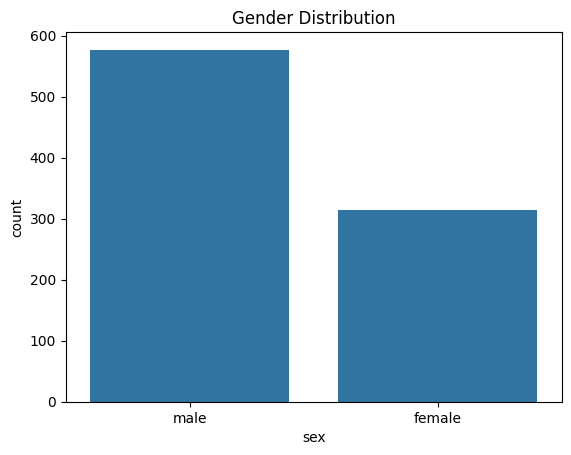

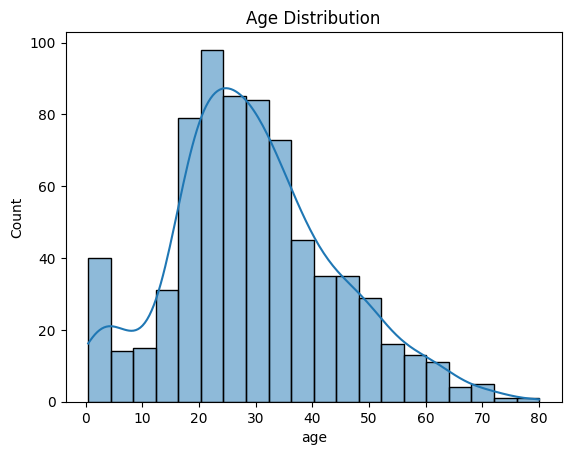

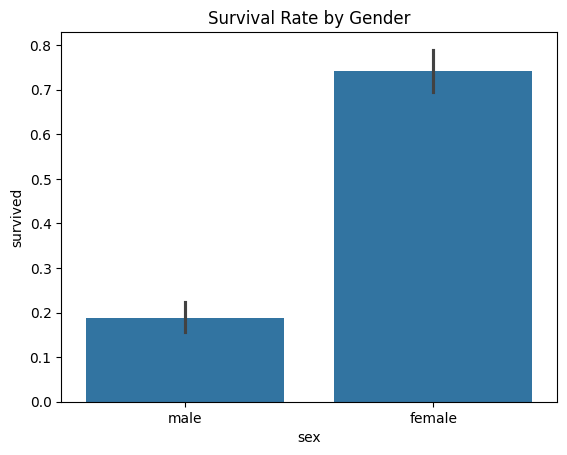

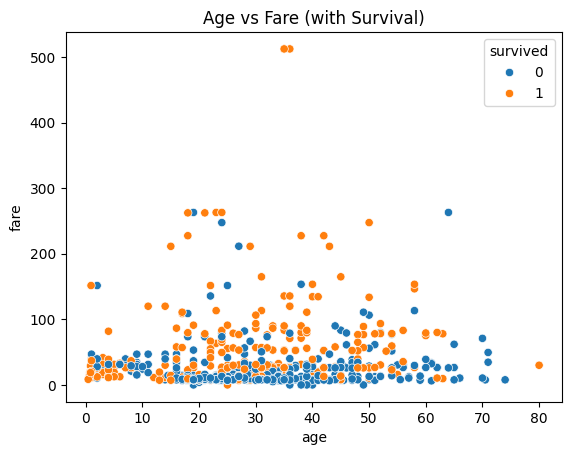

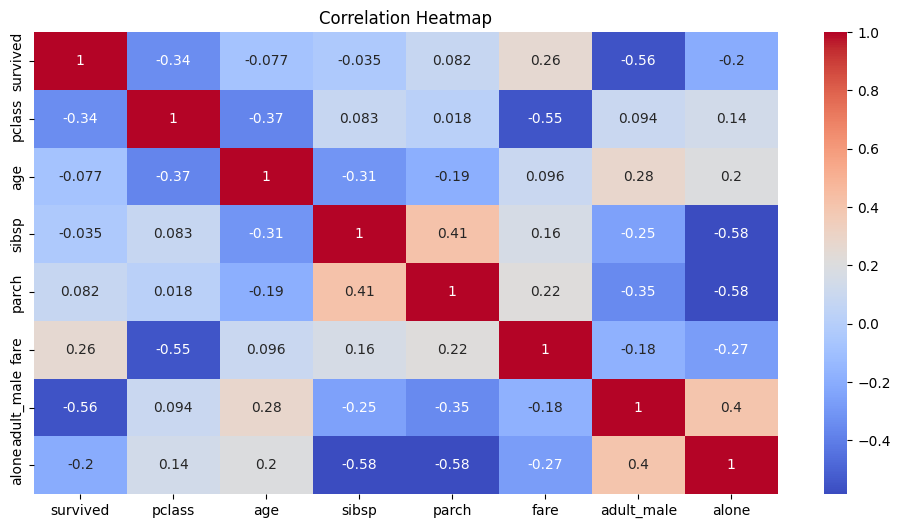


Number of Fare Outliers: 116

Cleaned Dataset Shape: (712, 15)


In [1]:
# ---------------------------------------------------------
# 1) Import Libraries
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For cleaner display
pd.set_option('display.max_columns', None)

# ---------------------------------------------------------
# 2) Load Sample Dataset (Titanic)
# ---------------------------------------------------------
df = sns.load_dataset("titanic")
print("Dataset Loaded Successfully\n")

# Preview
print(df.head())

# ---------------------------------------------------------
# 3) Basic Information
# ---------------------------------------------------------
print("\n--- BASIC INFO ---")
print(df.info())

print("\n--- SHAPE ---")
print(df.shape)

print("\n--- SUMMARY STATISTICS ---")
print(df.describe(include='all'))

# ---------------------------------------------------------
# 4) Check Missing Values
# ---------------------------------------------------------
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# ---------------------------------------------------------
# 5) Univariate Analysis
# ---------------------------------------------------------

# Categorical variable example
sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.show()

# Numerical variable example
sns.histplot(df["age"].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# ---------------------------------------------------------
# 6) Bivariate Analysis
# ---------------------------------------------------------

# Survival rate by gender
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Age vs Fare
sns.scatterplot(x="age", y="fare", hue="survived", data=df)
plt.title("Age vs Fare (with Survival)")
plt.show()

# ---------------------------------------------------------
# 7) Correlation Matrix
# ---------------------------------------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------------------
# 8) Outlier Detection (IQR Method)
# ---------------------------------------------------------
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["fare"] < lower) | (df["fare"] > upper)]
print("\nNumber of Fare Outliers:", len(outliers))

# ---------------------------------------------------------
# 9) Final Cleaned Dataset (Example)
# ---------------------------------------------------------
df_clean = df.dropna(subset=["age", "embarked"])
print("\nCleaned Dataset Shape:", df_clean.shape)
